# Import Libraries 

In [44]:
# import libraries 
import pandas as pd
import os 
import numpy as np
from PIL import Image
from sklearn import preprocessing
from pathlib import Path
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std


In [45]:
# import ML methods 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [30]:
#import conusion matrix (plot)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load training Data

In [5]:
# load x train data
def get_images(path):
    all_images_as_array = []
    label = []
    # open file
    for filename in os.listdir(path):
        img = Image.open(path+filename)
        #resize 
        new_img = img.resize((64, 64))
        #convert to array
        np_array = np.asarray(new_img)
        #apprend to one array
        all_images_as_array.append(np_array)

    return np.array(all_images_as_array)
#path to image folder
x_train = get_images('Datasets\\celeba\\img\\')
#reshappe and re-process image 
x_train = np.reshape(x_train, (x_train.shape[0], -1))
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

In [6]:
# import y label train

# open csv file with labele s
dataFrame = pd.read_csv('Datasets\\celeba\\labels.csv',header = None, prefix="data")
#create pandas tabel 
dataFrame['data1']= dataFrame['data0'].str.split('\t')
#seperate into columns 
df3 = pd.DataFrame(dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
# separate out geneder information and replace -1 with 0 
df3['gender'] = df3['gender'].replace(['-1'], '0')
# reorder to same os image inputs 
df3 = df3.sort_values(by ='image_number')
#remove column heading 
df3 = df3.drop(0)
# change to int64
df3['gender'] = pd.to_numeric(df3['gender'])
y_train = df3['gender']


,image_number,jpg,gender,smiling
1,0,0.jpg,0,1
2,1,1.jpg,0,1
11,10,10.jpg,0,1
101,100,100.jpg,0,-1
1001,1000,1000.jpg,0,1
...,...,...,...,...
996,995,995.jpg,0,1
997,996,996.jpg,0,-1
998,997,997.jpg,0,-1
999,998,998.jpg,1,-1


# Split training data 

In [7]:
#split data 
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2) 

# Cross validation to select the best model 

In [141]:
# create dicotary to hold CV results 
CV_df = pd.DataFrame({"METHOD":[],"MEAN":[],
                         "STD":[]})
#cross validation - split data into 10 graoups and repate 3 times 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [114]:
#Logistic regression 
# create model
model= LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
CV_df_LR = {'Method':'Logistic regression','MEAN':scores.mean(),'STD':scores.std()}


In [139]:
#Decision  tree 
#creat model 
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
CV_df_DT = {'Method':'Decision Tree','MEAN':scores.mean(),'STD':scores.std()}

In [116]:
#Random Forest  
#creat model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
CV_df_RF = {'Method':'Random Forest','MEAN':scores.mean(),'STD':scores.std()}

In [117]:
#K nearest Neighbours  
#creat model
model = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
CV_df_KN = {'Method':'K-Nearest Neighbors','MEAN':scores.mean(),'STD':scores.std()}

In [118]:
#compile dictoaries int oone pandnas tabel
list_of_dict = CV_df_LR, CV_df_DT,CV_df_RF,CV_df_KN
# Create Dataframe from list of dictionaries and
# pass another list as index
df = pd.DataFrame(list_of_dict)
df

,Method,MEAN,STD
0,Logistic regression,0.905167,0.010546
1,Decision Tree,0.770500,0.019573
2,Random Forest,0.867417,0.017242
3,K-Nearest Neighbors,0.734000,0.024157


# Logistic regression model 



In [53]:
# make model of ligistic regession (highest accuracy of the CV) 
models= LogisticRegression()
    
# Fit the classifier
models.fit(x_train, y_train)
    
# Make predictions
predictions = models.predict(x_test)

# Calculate metrics
accuracy= accuracy_score(predictions, y_test)
print(accuracy)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.915


In [17]:
# Create the parameter grid based on the results of random search 
param_grid = { 'C':[100,10,1.0,0.1,0.01]}

# Create a based model
lr =LogisticRegression()
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [101]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished
C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01)

In [100]:
# result of CV into tabel 
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.01,{'C': 0.01},1,0.903500,0.001398
0.1,{'C': 0.1},2,0.895250,0.001286
1.0,{'C': 1.0},3,0.891749,0.002356
100,{'C': 100},4,0.890000,0.001510
10,{'C': 10},5,0.888750,0.001375


In [97]:
# extract paramets and test scores 
r_df = results_df[['param_C','split0_test_score','split1_test_score' , 'split2_test_score']]

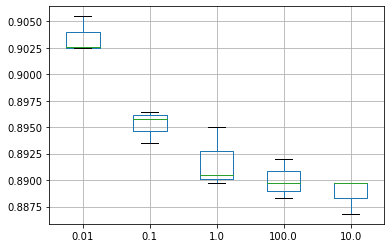

In [99]:
# plot test scores 
df = r_df.set_index('param_C')
df.T.boxplot()

In [56]:
#load classifier 
models = LogisticRegression(C= 0.01)
    
# Fit the classifier
models.fit(x_train, y_train)
    
# Make predictions
predictions = models.predict(x_test)

# Calculate metrics
accuracy= accuracy_score(predictions, y_test)
print(accuracy)

0.926


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# import test data 

In [49]:
# import y label test
test_dataFrame = pd.read_csv('Datasets\\celeba_test\\labels.csv',header = None, prefix="data")
test_dataFrame['data1']= test_dataFrame['data0'].str.split('\t')
test_df3 = pd.DataFrame(test_dataFrame['data1'].to_list(), columns=['image_number','jpg','gender','smiling'])
test_df3['gender'] = test_df3['gender'].replace(['-1'], '0')
test_df3 = test_df3.sort_values(by ='image_number')
test_df3 = test_df3.drop(0)
test_df3['gender'] = pd.to_numeric(test_df3['gender'])
y_test_test_data = test_df3['gender']

In [50]:
# load x test data 
def get_images(path):
    all_images_as_array = []
    label = []
    
    for filename in os.listdir(path):
        img = Image.open(path+filename)
        new_img = img.resize((64, 64))
        np_array = np.asarray(new_img)
        all_images_as_array.append(np_array)

    return np.array(all_images_as_array)
x_test_test_data = get_images('Datasets\\celeba_test\\img\\')
x_test_test_data = np.reshape(x_test_test_data, (x_test_test_data.shape[0], -1))
scaler = preprocessing.StandardScaler().fit(x_test_test_data)
x_test_test_data = scaler.transform(x_test_test_data)

# Make prediction on the test data set 

In [51]:
# Make predictions
predictions = models.predict(x_test_test_data)

# Calculate metrics
accuracy= accuracy_score(predictions, y_test_test_data)
print(accuracy)

0.91


# confusion matrix 

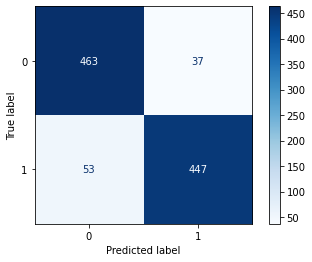

In [105]:
# plot confusion matrix 
plot_confusion_matrix(models, x_test_test_data, y_test_test_data, cmap=plt.cm.Blues)  
plt.show()